<a href="https://colab.research.google.com/github/tahamsi/computer-vision/blob/main/week-8/Object_Detection_with_yolo11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/tahamsi/computer-vision)

#YOLO

**YOLO** (You Only Look Once) is a popular deep learning model used for real-time object detection. It was introduced by Joseph Redmon and is known for its ability to detect multiple objects in an image or video frame with high speed and accuracy. YOLO stands out due to its innovative approach of treating object detection as a single regression problem, enabling it to predict bounding boxes and class probabilities directly from full images in one evaluation.

**Key Features**
* Single-Pass Detection: Unlike traditional object detection methods that use a multi-stage process (e.g., region proposal and classification), YOLO processes an image in a single neural network pass, making it extremely fast and suitable for real-time applications.
* Grid-Based Prediction: YOLO divides the input image into a grid and assigns each grid cell the responsibility of predicting bounding boxes and their associated class probabilities if the center of an object falls within that cell.
* End-to-End Learning: The model is trained end-to-end, optimizing for both object localization and classification simultaneously.
* Speed and Efficiency: YOLO is capable of processing images at high frame rates, making it suitable for applications that require real-time performance, such as video surveillance, autonomous vehicles, and interactive systems.

#YOLO11

[Ultralytics YOLO11](https://github.com/ultralytics/ultralytics) is a state-of-the-art model that builds on the success of previous YOLO versions, incorporating new features and enhancements to further improve performance and flexibility. **YOLO11** is designed to be fast, accurate, and user-friendly, making it an ideal choice for a variety of tasks, including object detection, tracking, instance segmentation, image classification, and pose estimation.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Nov  3 15:54:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11

Install the **Ultralytics** package, along with all required dependencies, in a **Python** environment (version 3.8 or higher) with **PyTorch** (version 1.8 or higher) using the following command: `pip install ultralytics`.

In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.1/112.6 GB disk)


## Pre-trained on COCO dataset

## CLI

YOLO may be used directly in the Command Line Interface (CLI) with a `yolo` command:

In [ ]:
!yolo predict model=yolo11n.pt source='https://ultralytics.com/images/bus.jpg' conf=0.25 save=True

100% 5.35M/5.35M [00:00<00:00, 105MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 134k/134k [00:00<00:00, 6.12MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 68.4ms
Speed: 13.2ms preprocess, 68.4ms inference, 1135.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


Note: the annotated result image has been saved in `{HOME}/runs/detect/predict/`. Let's display it.

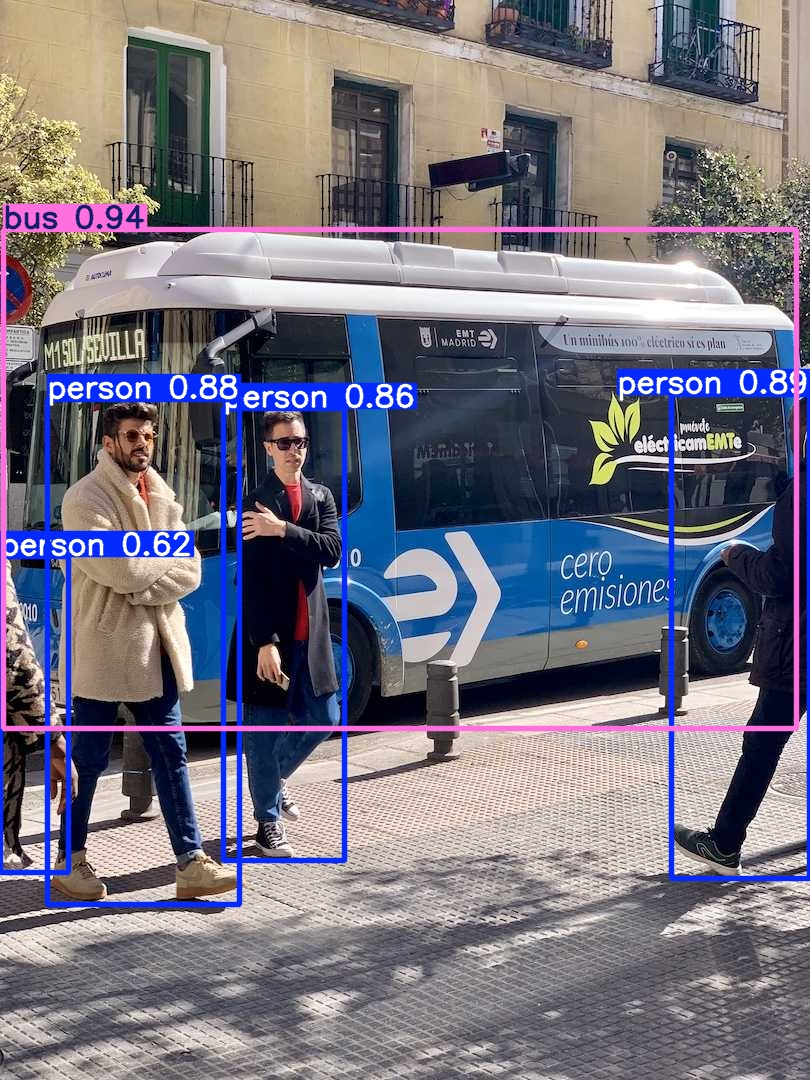

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/predict/bus.jpg', width=400)

If you aim to train, validate, or perform inference on models without requiring any alterations to the code, utilizing the YOLO command-line interface provides the simplest way to begin. Read more about CLI in [Ultralytics YOLO Configuration](https://docs.ultralytics.com/usage/cfg/) and [GitHub](https://github.com/ultralytics/ultralytics?tab=readme-ov-file).

```
yolo task=detect    mode=train    model=yolov11n.yaml      args...
          classify       predict        yolov11n-cls.yaml  args...
          segment        val            yolov11n-seg.yaml  args...
          Pose           export         yolov11n.pt        format=onnx  args...
          OBB            track
                          benchmark
```

### 🐍 Python SDK

The most straightforward approach is to directly employ YOLOv11 within a Python environment.

Refer to Ultralytics for more information on different `checkpoints`.

**Checkpoints** in machine learning are saved snapshots of a model’s state during or after training. These checkpoints store the model's weights, biases, and potentially other information like training progress and optimizer states.

In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open(requests.get('https://ultralytics.com/images/bus.jpg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x480 4 persons, 1 bus, 69.7ms
Speed: 5.1ms preprocess, 69.7ms inference, 962.3ms postprocess per image at shape (1, 3, 640, 480)


The prebuilt version of YOLO11 includes 80 classes, as listed below:

`{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}`

**NOTE:** The obtained `result` object stores information about the location, classes, and confidence levels of the detected objects.

In [ ]:
result.boxes.xyxy

tensor([[3.8328e+00, 2.2936e+02, 7.9619e+02, 7.2841e+02],
        [6.7102e+02, 3.9483e+02, 8.0981e+02, 8.7871e+02],
        [4.7405e+01, 3.9957e+02, 2.3930e+02, 9.0419e+02],
        [2.2306e+02, 4.0869e+02, 3.4447e+02, 8.6044e+02],
        [2.1739e-02, 5.5607e+02, 6.8886e+01, 8.7236e+02]], device='cuda:0')

In [ ]:
result.boxes.conf

tensor([0.9402, 0.8882, 0.8783, 0.8558, 0.6219], device='cuda:0')

In [ ]:
result.boxes.cls

tensor([5., 0., 0., 0., 0.], device='cuda:0')

**NOTE:** YOLO11 can be easily integrated with `supervision` using the familiar `from_ultralytics` connector.

**NOTE**: [Roboflow Supervision](https://github.com/roboflow/supervision) refers to a set of tools and features provided by Roboflow, a platform designed to simplify and enhance the development of computer vision models. Roboflow offers a comprehensive suite for data annotation, preprocessing, model training, and deployment, aimed at improving the workflow and performance of machine learning projects.

In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

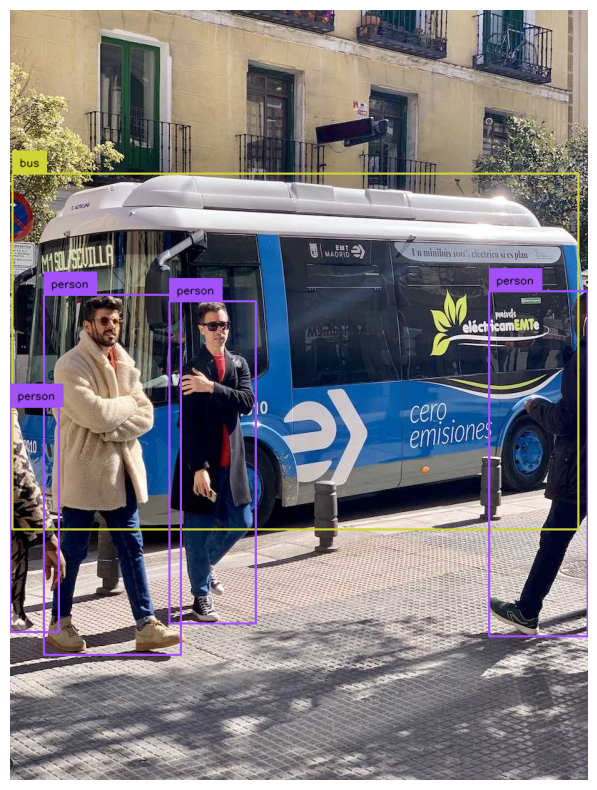

In [ ]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

## Fine-tune YOLO11 on custom dataset

## Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. However, you can also use other annotation platforms or manually load a dataset.

Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

### Data annotation
To annotate images for object detection using Roboflow, follow the steps outlined in this [tutorial](https://roboflow.com/how-to-label/yolo11).

In [ ]:
!pip install roboflow --quiet
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key='ROBOFLOW_API_KEY')

workspace = rf.workspace("liangdianzhong")
project = workspace.project("-qvdww")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to 两点钟模型-3 in yolov11:: 100%|██████████| 2612/2612 [00:00<00:00, 2734.67it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=5 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 213MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/两点钟模型-3/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`.

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   PR_curve.png		  val_batch0_pred.jpg
confusion_matrix_normalized.png			   R_curve.png		  val_batch1_labels.jpg
confusion_matrix.png				   results.csv		  val_batch1_pred.jpg
events.out.tfevents.1730649384.f1f75d3fda5f.920.0  results.png		  val_batch2_labels.jpg
F1_curve.png					   train_batch0.jpg	  val_batch2_pred.jpg
labels_correlogram.jpg				   train_batch1.jpg	  weights
labels.jpg					   train_batch2.jpg
P_curve.png					   val_batch0_labels.jpg


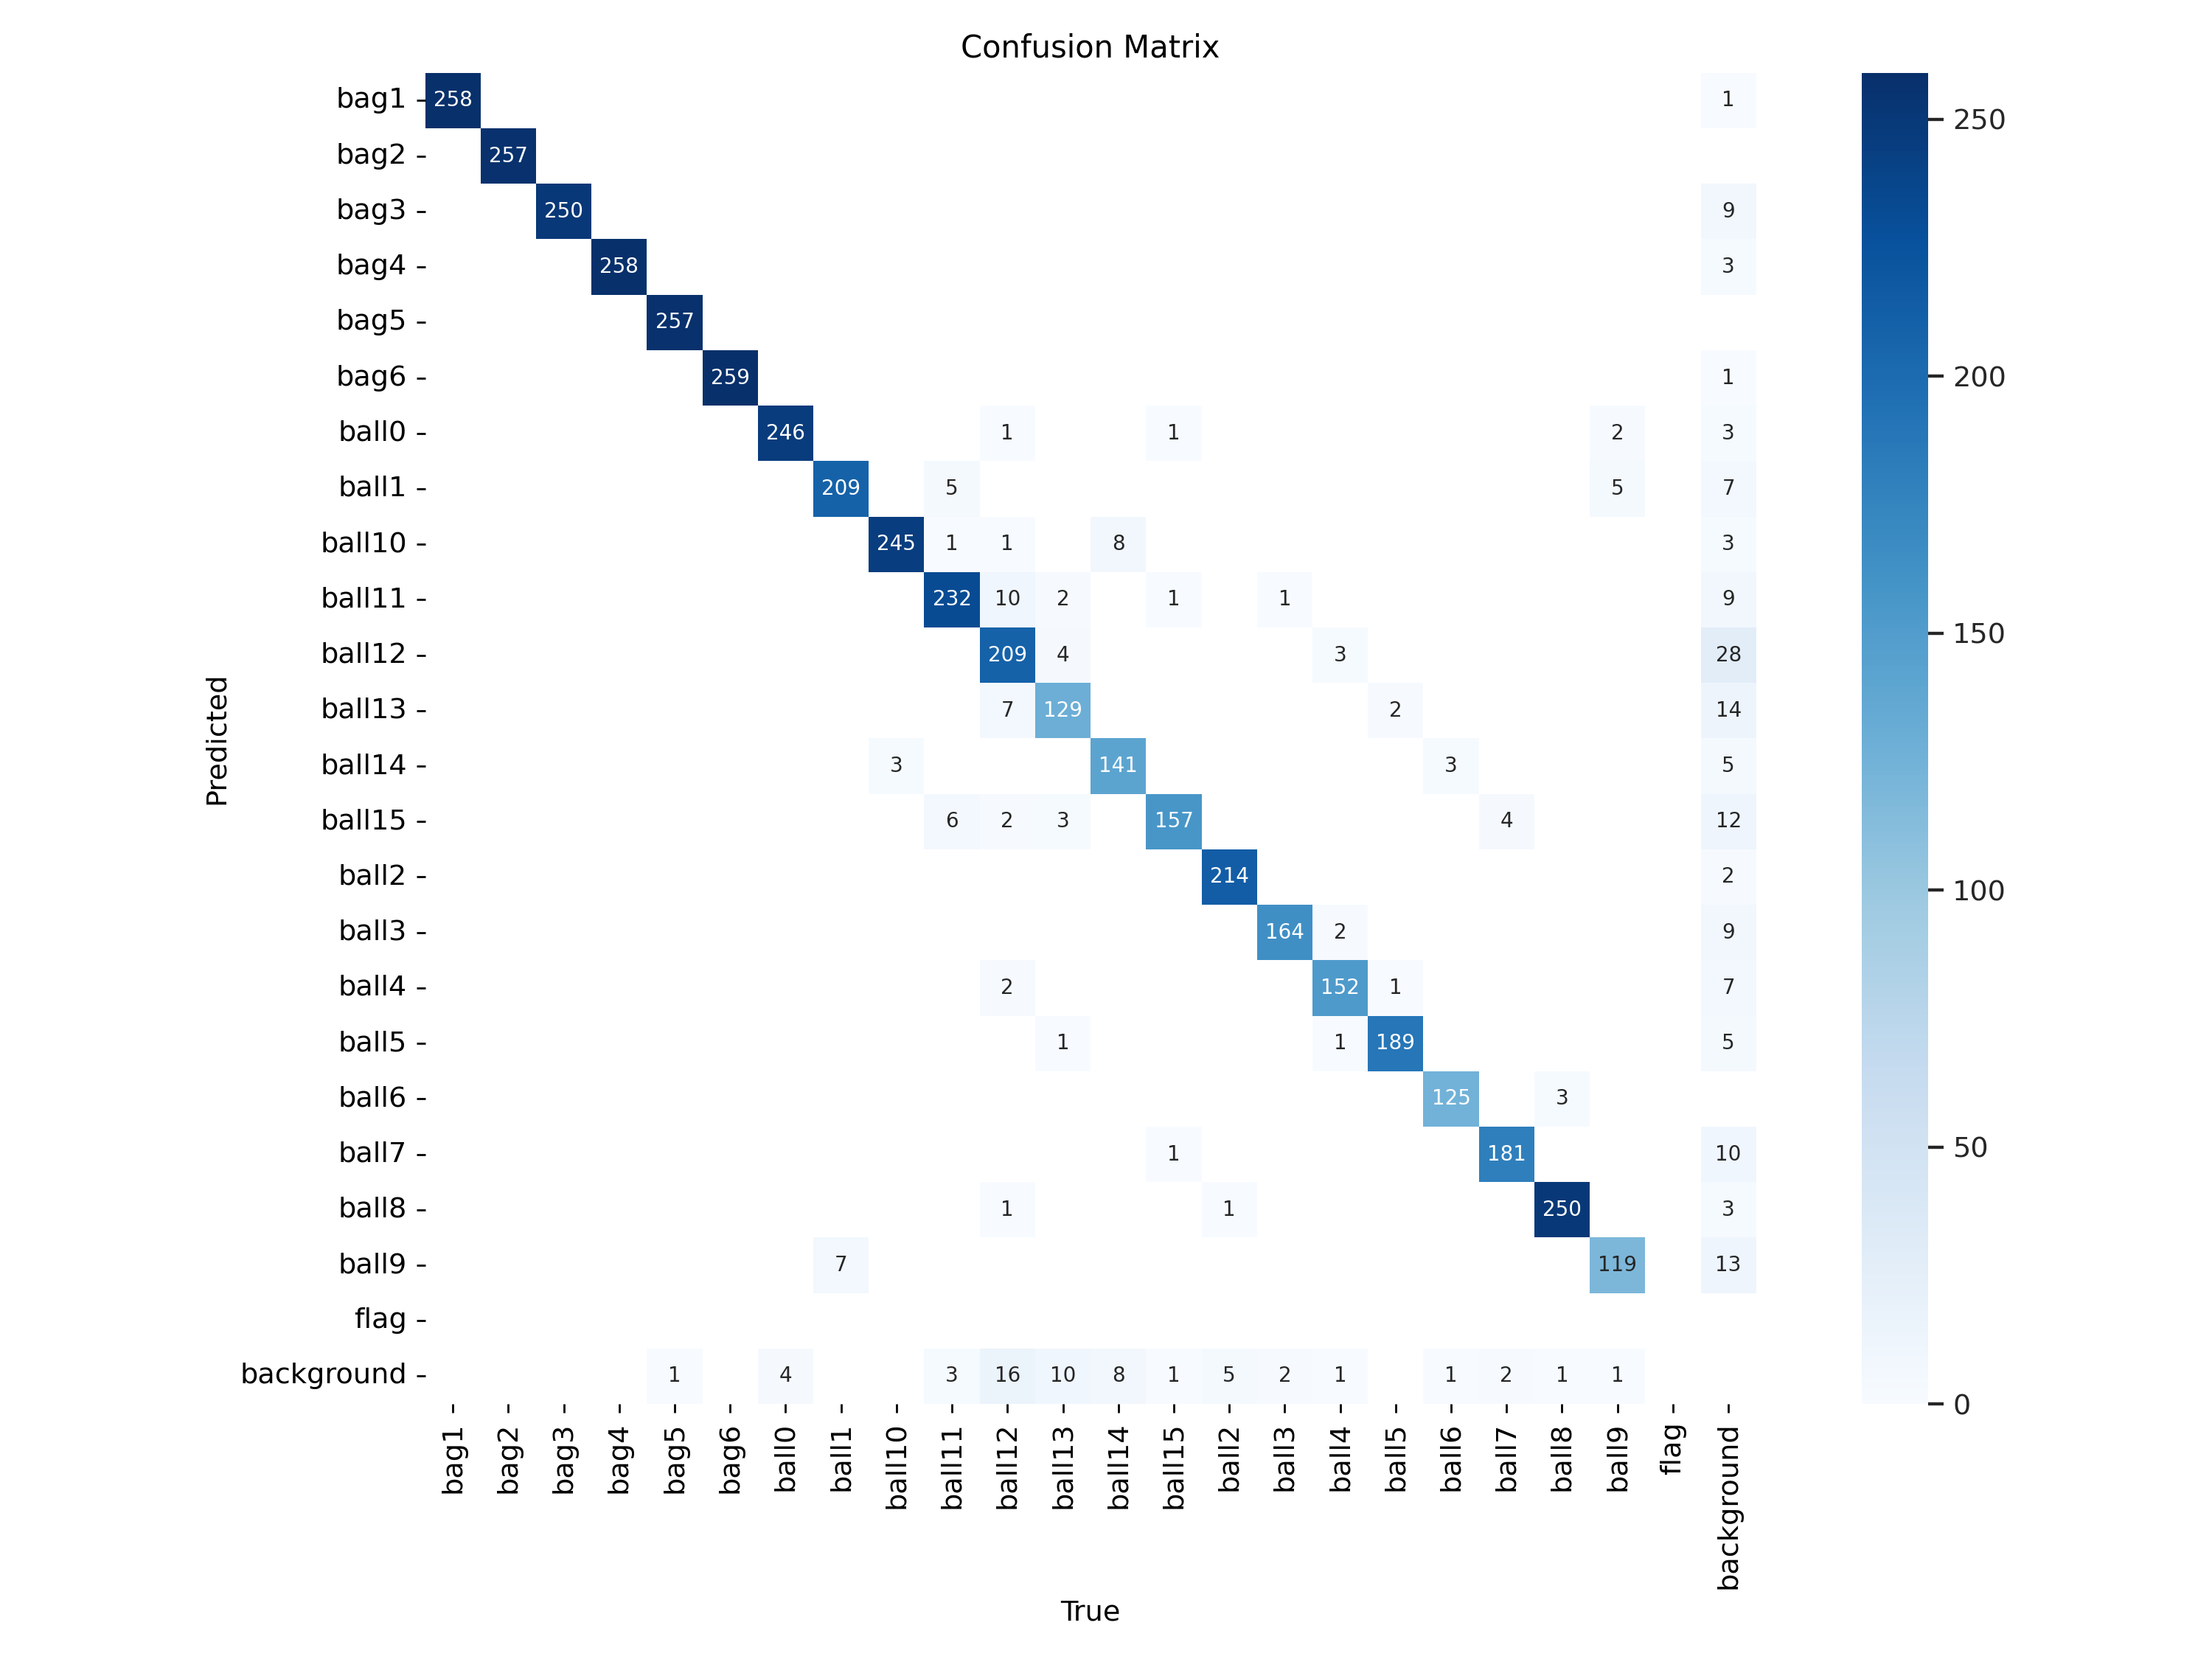

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

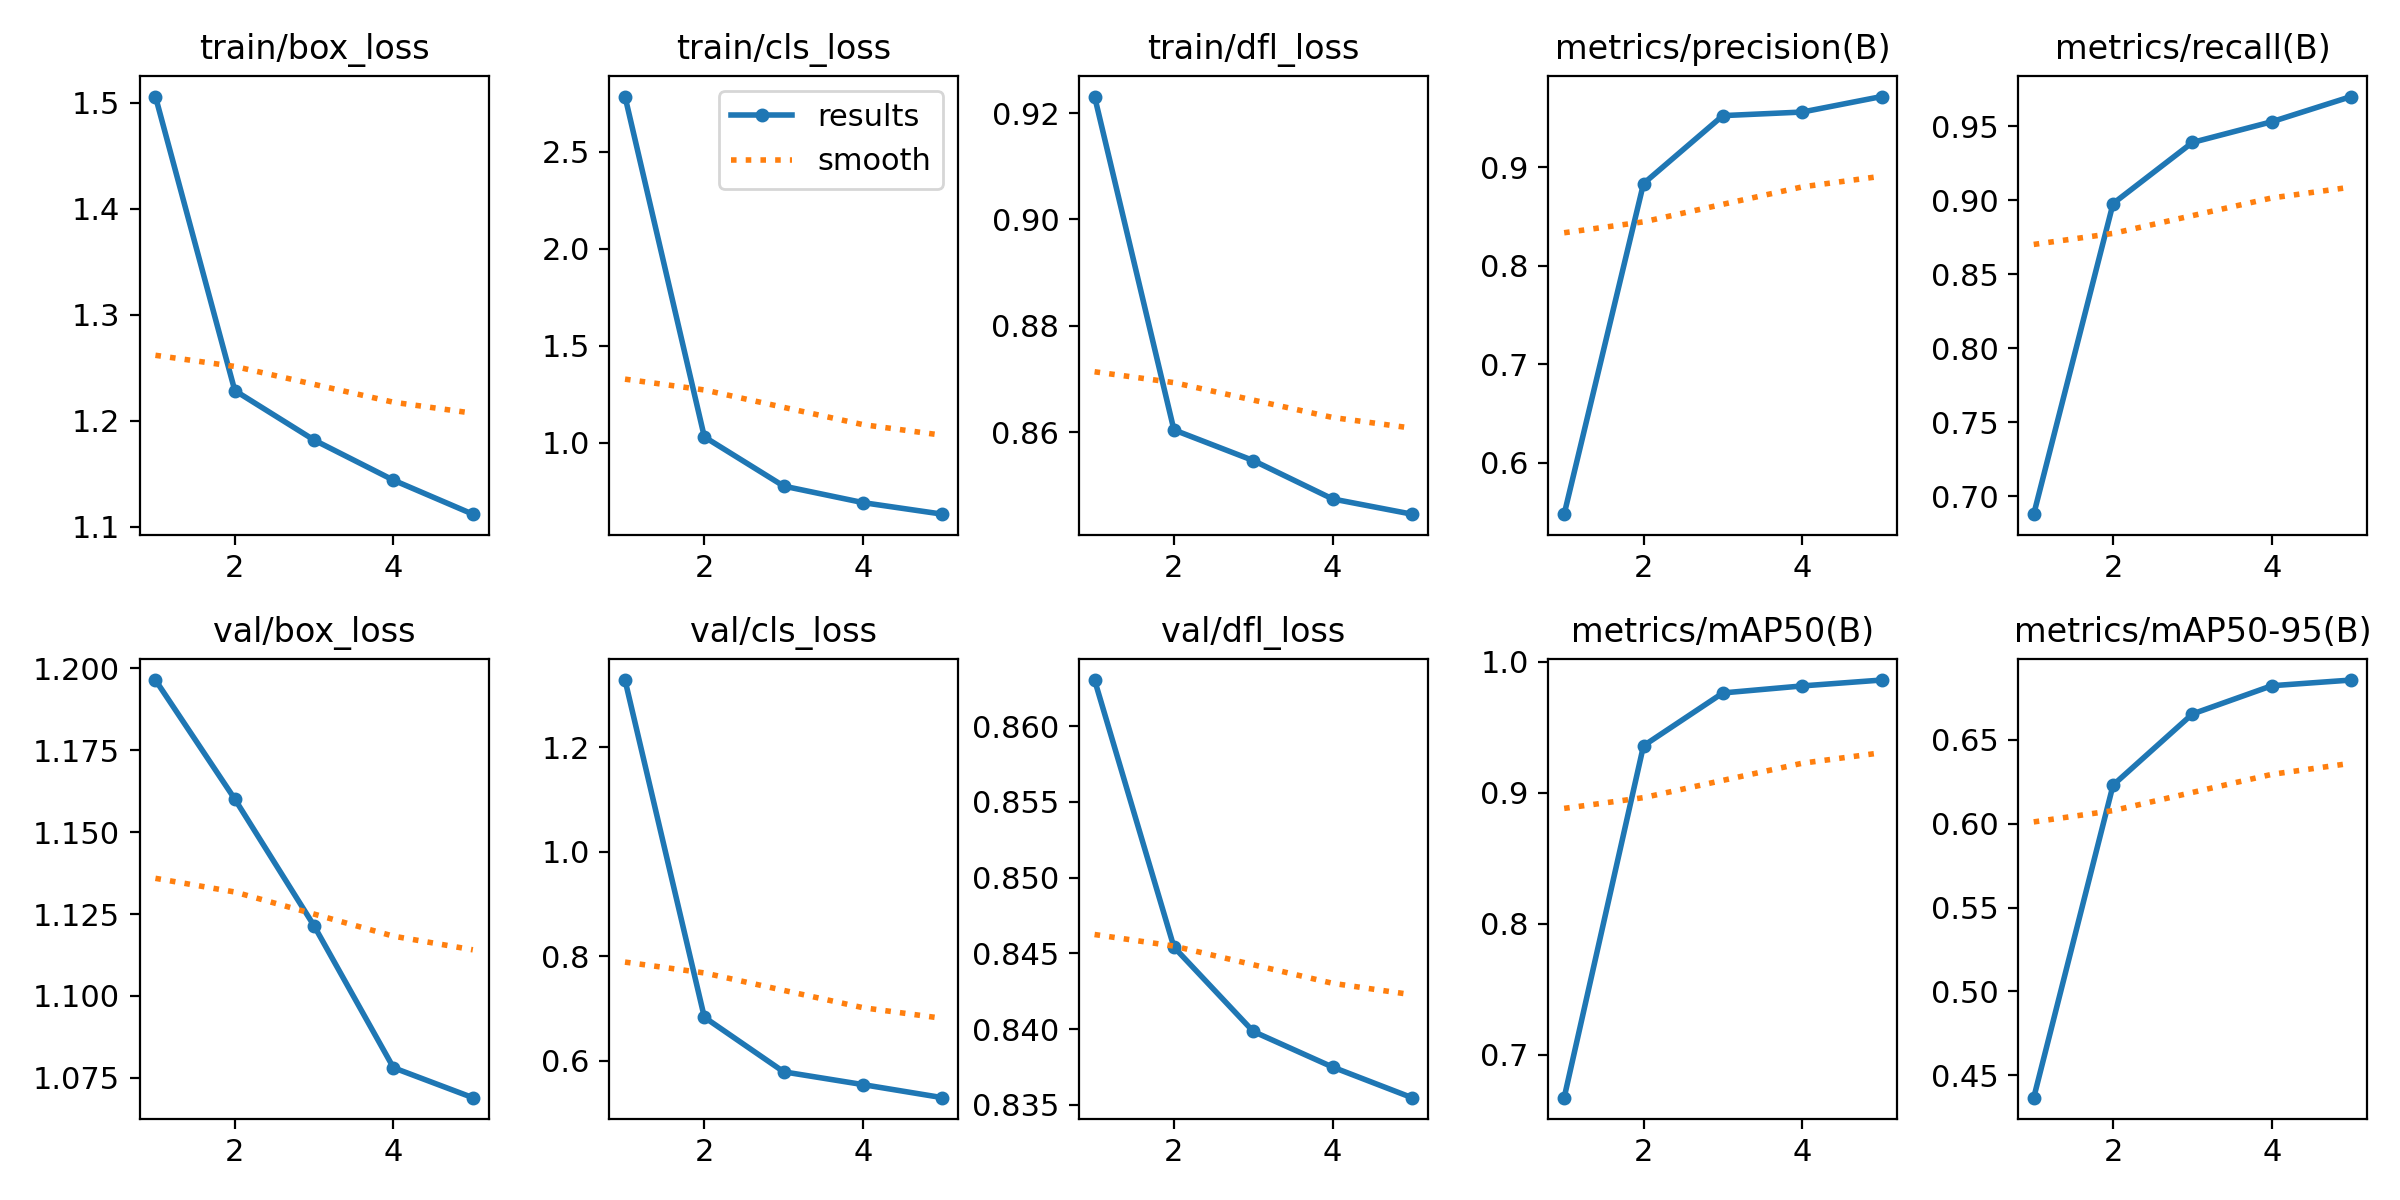

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

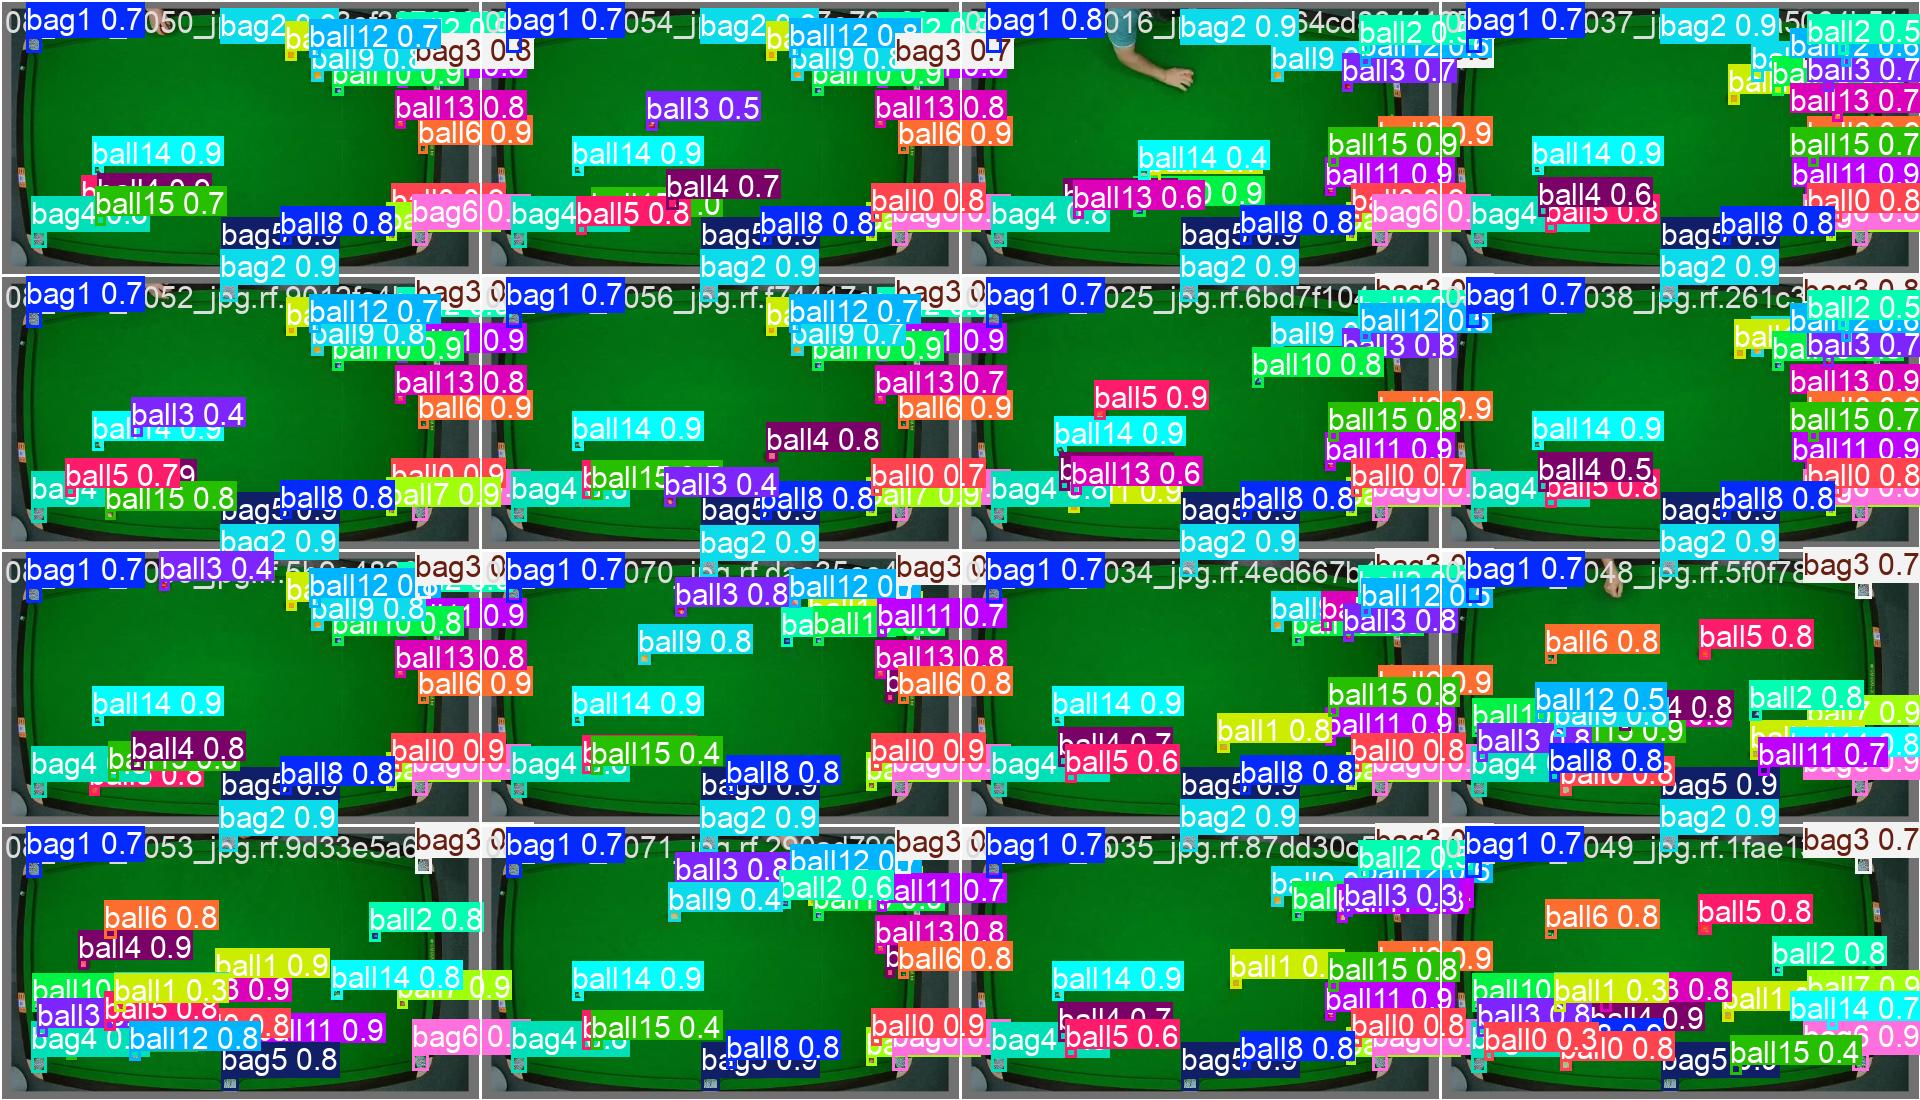

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,421,701 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/两点钟模型-3/valid/labels.cache... 259 images, 0 backgrounds, 0 corrupt: 100% 259/259 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/两点钟模型-3/valid/images/08_21C_0250_jpg.rf.b164fca68a7a644a126019aa776912c1.jpg: 2 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:07<00:00,  2.13it/s]
                   all        259       4652      0.972       0.97      0.986      0.689
                  bag1        258        258      0.997          1      0.995      0.645
                  bag2        257        257      0.998          1      0.995      0.798
                  bag3        250        250      0.964          1      0.991      0.658
                  bag4        258        258      0.997          1      0.995      

## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,421,701 parameters, 0 gradients, 21.3 GFLOPs

image 1/130 /content/datasets/两点钟模型-3/test/images/08_21A_0007_jpg.rf.9e8959e1a1730f1c5c940d000b3d416c.jpg: 384x640 1 bag1, 1 bag2, 1 bag3, 1 bag4, 1 bag5, 1 bag6, 1 ball0, 1 ball10, 1 ball12, 1 ball13, 1 ball2, 1 ball5, 1 ball8, 46.6ms
image 2/130 /content/datasets/两点钟模型-3/test/images/08_21A_0008_jpg.rf.2dd16a0099bef3498fc559918545a9bd.jpg: 384x640 1 bag1, 1 bag2, 1 bag3, 1 bag4, 1 bag5, 1 bag6, 1 ball0, 1 ball10, 1 ball12, 1 ball13, 1 ball2, 1 ball5, 1 ball8, 11.0ms
image 3/130 /content/datasets/两点钟模型-3/test/images/08_21A_0022_jpg.rf.fe9e24fff670ceb0338b20bd49351eda.jpg: 384x640 1 bag1, 1 bag2, 1 bag3, 1 bag4, 1 bag5, 1 bag6, 1 ball0, 1 ball10, 1 ball12, 1 ball2, 1 ball5, 1 ball8, 10.8ms
image 4/130 /content/datasets/两点钟模型-3/test/images/08_21A_0088_jpg.rf.822feee76db82a3f805ca5dfd2a4f19c.jpg: 384x640 1 bag1, 1 bag2, 1 ba

**NOTE:** Let's take a look at few results.

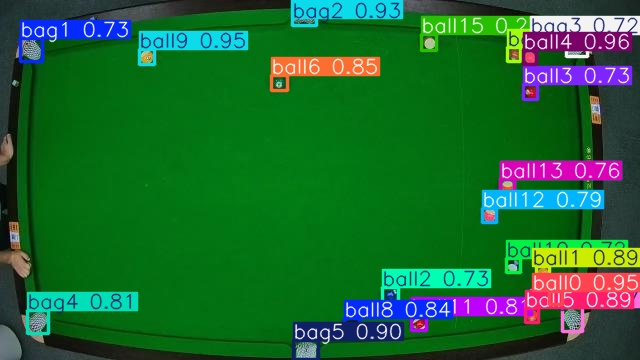

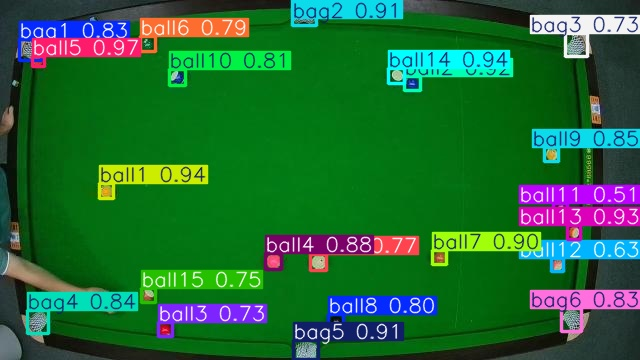

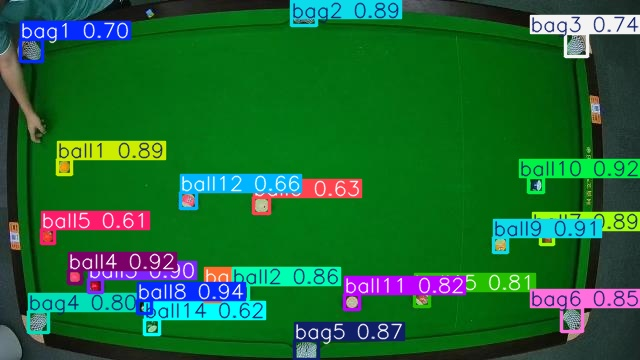

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv11 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv11 weights.

In [ ]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

In [ ]:
!pip install inference

In [ ]:
import os, random, cv2
import supervision as sv
import IPython
import inference

model_id = project.id.split("/")[1] + "/" + dataset.version
model = inference.get_model(model_id, userdata.get('ROBOFLOW_API_KEY'))

# Location of test set images
test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image, confidence=0.4, overlap=30)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = box_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)
